In [239]:
import numpy as np
import optimisation as opt
import estimation_environment as est
import importlib
importlib.reload(opt)
importlib.reload(est)

<module 'estimation_environment' from '/Users/krzywdaja/Documents/obsedian_test/Brain2/Science/Projects/Estimation-AI/Code/estimation_environment.py'>

## Open AI gym


In [240]:

import numpy as np
# Load the TensorBoard notebook extension
%load_ext tensorboard
import matplotlib.pyplot as plt
from stable_baselines3.common.evaluation import evaluate_policy

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [251]:
tcs = [50,100,250,500,1000]
om0 = 2
sigma  = 20
initial_std = 10
seed_environment =  None
seed_estimation = None


def policy_est(state, **kwargs):
    action = kwargs["rng_est"].choice([0,1,2],p=[1/3,1/3,1/3])
    return action


tc = 100000

env = est.FlexibleEstimationTime(length = 100, tc = tc, om0=om0, sigma = sigma, initial_std=initial_std, 
                    seed_shot= seed_environment, seed_field = seed_environment, 
                    max_time = 100, penalty = -1, over_f = False,
                    time_step = 1)


def always_estimate(state):
    #draw random integer between 0 and 99
    d = np.random.randint(0,5)
    return (1, d)
res = opt.game(3, env, policy=always_estimate)

In [253]:
res.actions

array([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,

In [87]:
res.rewards.sum(axis=1)

array([489., 459., 490.])

(0.0, 50.0)

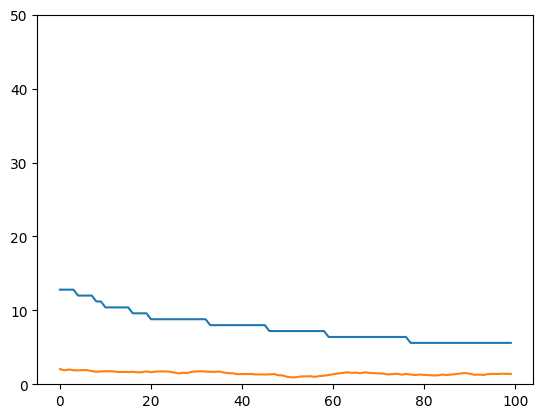

In [254]:
plt.plot(res.mus[0])
plt.plot(np.abs(res.oms[0]))
plt.ylim(0,50)
#plt.plot(res.stds[0])
#plt.plot(np.abs(res.mus[0] - np.abs(res.oms[0])))

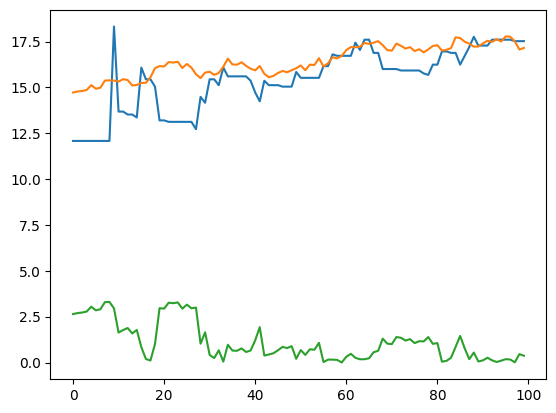

In [231]:
plt.plot(np.abs(np.array(res.mus[0])))
plt.plot(np.abs(np.array(res.oms[0])))
plt.plot(res.get_error()[0])

In [186]:
import gymnasium as gym
import os
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.callbacks import CheckpointCallback
from stable_baselines3.common.callbacks import EvalCallback
#import monitor
from stable_baselines3.common.monitor import Monitor

# Save a checkpoint every 1000 steps
'''
checkpoint_callback = CheckpointCallback(
  save_freq=10000,
  save_path="./logs/",
  name_prefix="flex_",
  save_replay_buffer=True,
  save_vecnormalize=True,
)
'''


# Parallel environments
logdir ="./ppo_bayes_tensorboard/"
om0 = 20 
seed_environment = 1
penalty = -10
env = est.FlexibleEstimationTime(length = 100,tc = 1000, om0=om0, sigma = sigma, initial_std=initial_std, 
            seed_shot= None, seed_field = None, max_time = 40, penalty = penalty, over_f=False)    

env = Monitor(env, logdir)
eval_callback = EvalCallback(env, best_model_save_path="./logs2/",
                             log_path="./logs2/", eval_freq=20000,
                             deterministic=False, render=False, n_eval_episodes=25) #?

if not os.path.exists("./ppo_bayes_tensorboard/"):
    os.makedirs("./ppo_bayes_tensorboard/")

#model = model.load("logs/best_model.zip")
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log="./ppo_bayes_tensorboard/")

model.learn(total_timesteps=1000000, tb_log_name="PPO",callback=eval_callback )
model.save("flex")

    


Using cpu device
Wrapping the env in a DummyVecEnv.
Logging to ./ppo_bayes_tensorboard/PPO_5


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | -93      |
| time/              |          |
|    fps             | 1024     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -96.3       |
| time/                   |             |
|    fps                  | 805         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.013889755 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.37       |
|    explained_variance   | 0.00092     |
|    learning_rate        | 0.

In [39]:
%tensorboard --logdir ppo_bayes_tensorboard --port 6071

Reusing TensorBoard on port 6071 (pid 39511), started 0:00:41 ago. (Use '!kill 39511' to kill it.)

# Plot the reward for N=100

In [187]:

env = est.FlexibleEstimationTime(length = int(1e2), tc = 1000, om0=om0, sigma = sigma, initial_std=initial_std, 
            seed_shot= None, seed_field = None, max_time = 20, penalty = penalty, over_f=False)     
model = model.load("logs2/best_model.zip")
results = []
N = 5


#res1 = evaluate_policy(model, env, n_eval_episodes=N, deterministic=False, return_episode_rewards=True)

res2 =  opt.game(N, env, model)


In [189]:
res2.rewards.sum(axis=1)

array([  8.,  12.,  21., -26., -55.])

FileNotFoundError: [Errno 2] No such file or directory: 'figures/games1/f.png'

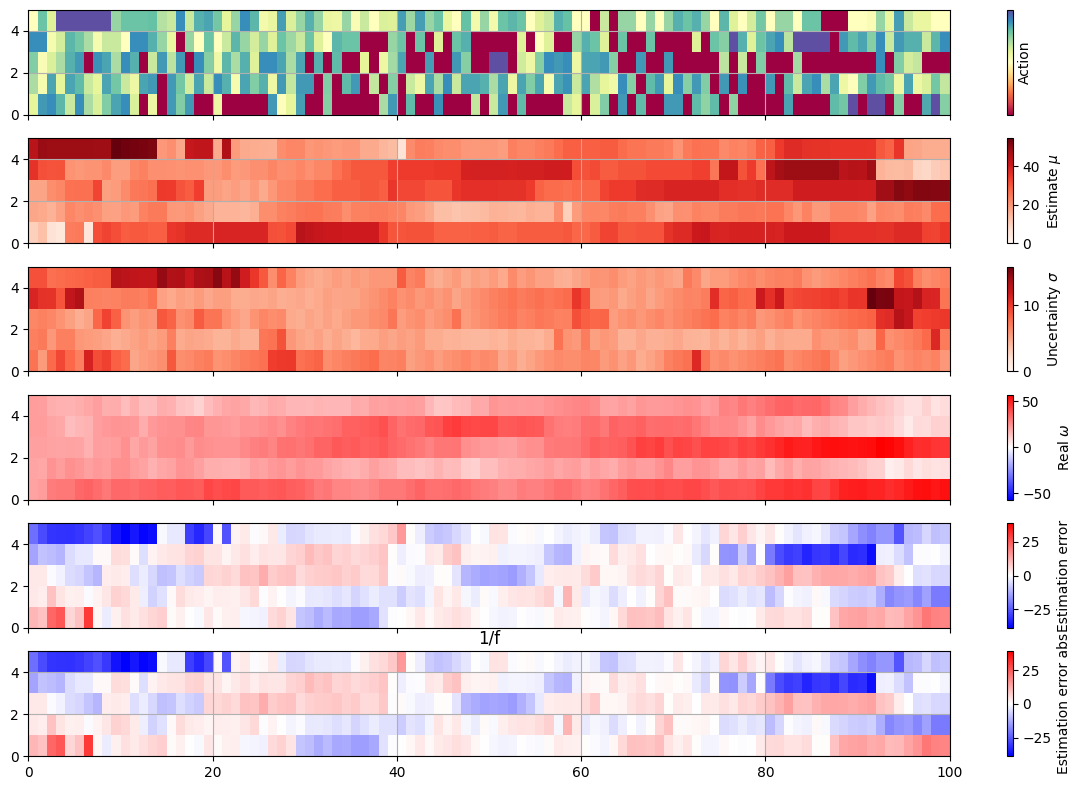

In [188]:
est.analyse_few_games2(res2, "1/f")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

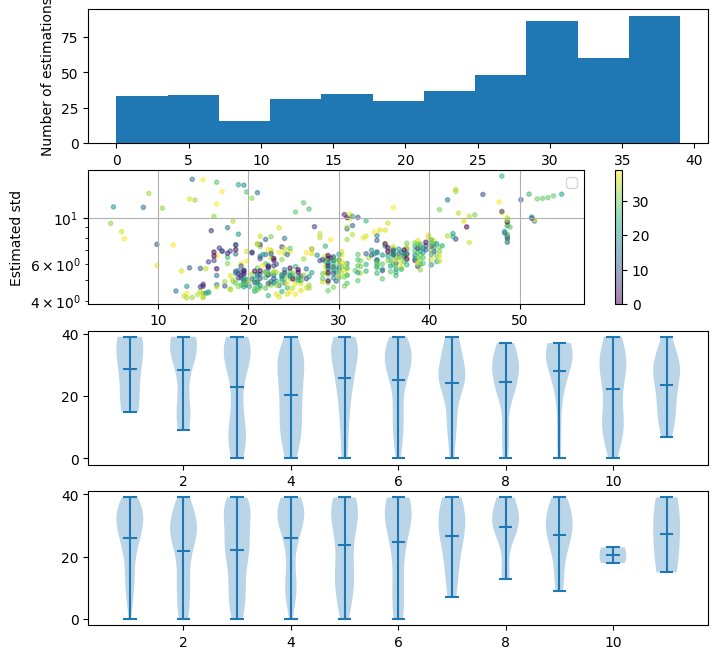

In [190]:
est.analyse_time(res2, "1/f")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Probability of estimation:  0.706
Probability of success:  0.26
Probability of failing:  0.034
Probability of success given flip:  0.8843537414965986


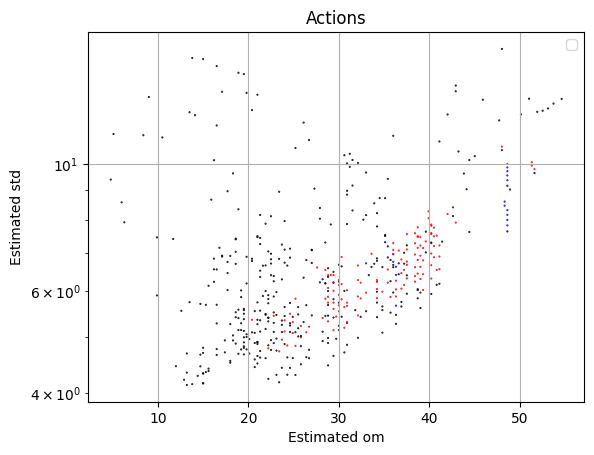

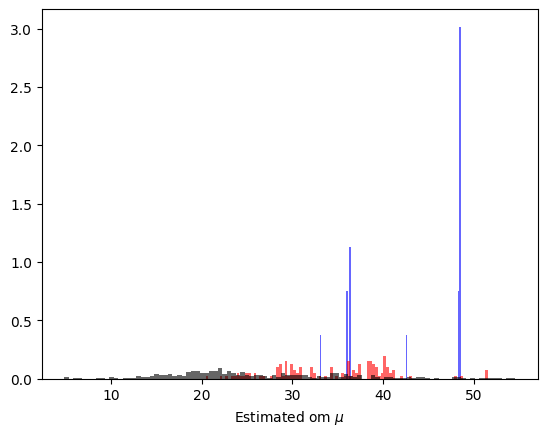

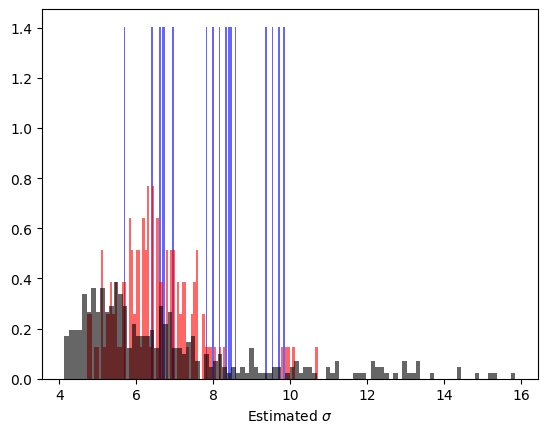

In [191]:
est.analyse_decisions(res2, str(1e3))

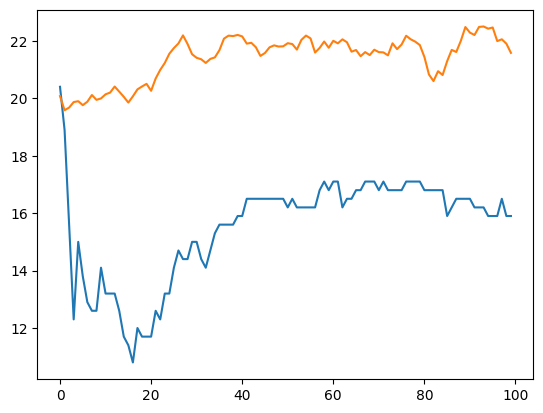

In [165]:
plt.plot(res2.mus[8])
plt.plot(np.abs(res2.oms[8]))

NameError: name 'colors' is not defined

<Figure size 640x480 with 0 Axes>

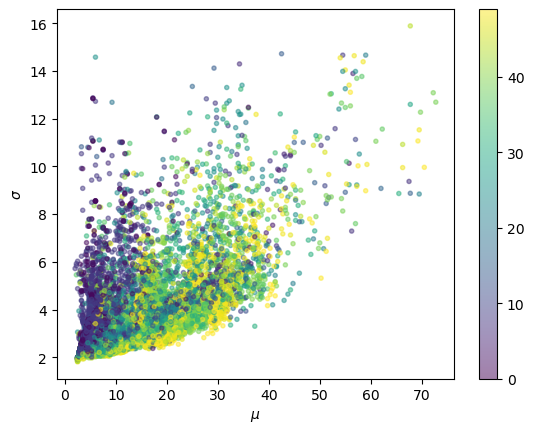

In [128]:
x = res2.mus[res2.actions[0]==1].flatten()
y = res2.stds[res2.actions[0]==1].flatten()
c = res2.actions[1][res2.actions[0]==1].flatten()


plt.scatter(x,y,c=c, alpha=0.5, marker=".")
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.colorbar()

ValueError: For X (7) and Y (3) with flat shading, A should have shape (2, 6, 3) or (2, 6, 4) or (2, 6) or (12,), not (2, 6, 1000)

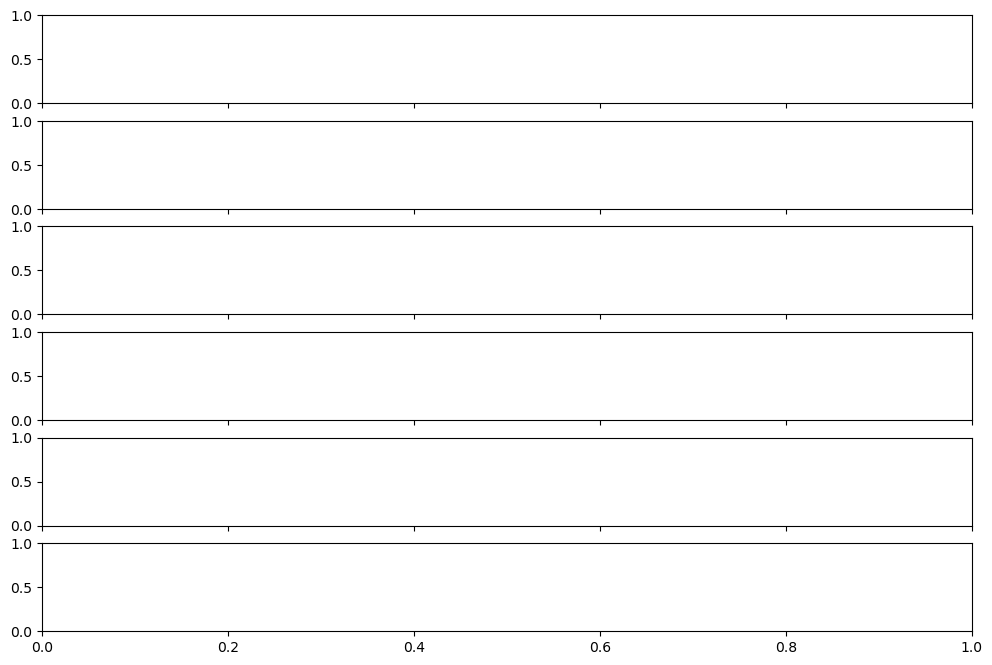

In [111]:


tcs = [1e3]
for tc in tcs:


    samples = 6
    model = model.load("flex")


    results = opt.game(episodes = samples, model=model, env=env)
    
    est.analyse_few_games(results, str(tc))



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


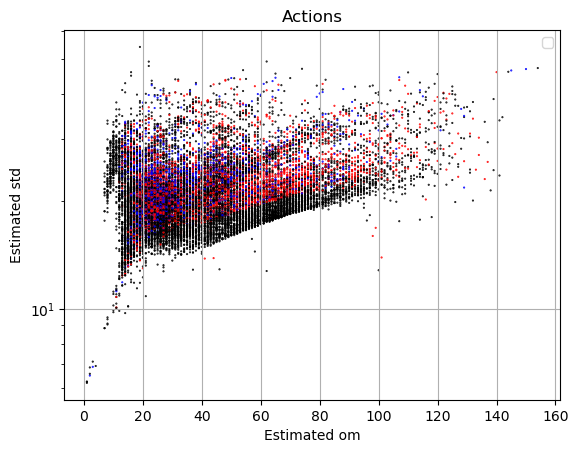

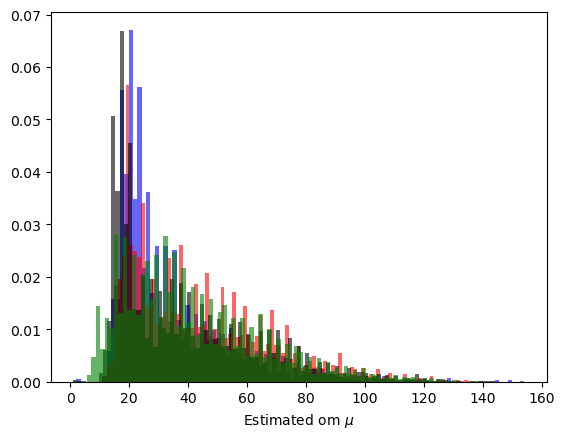

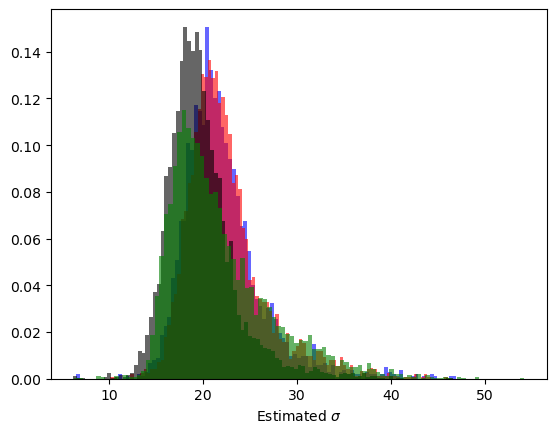

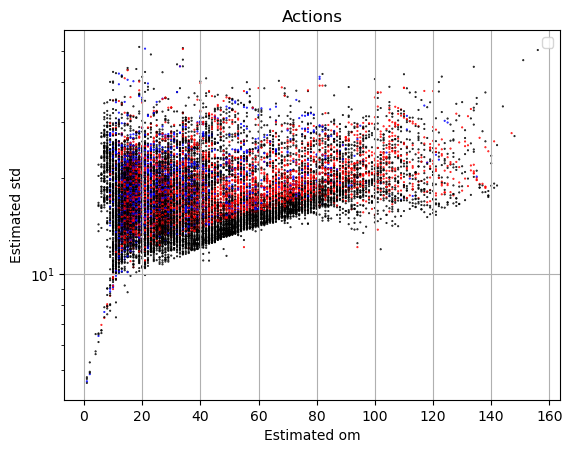

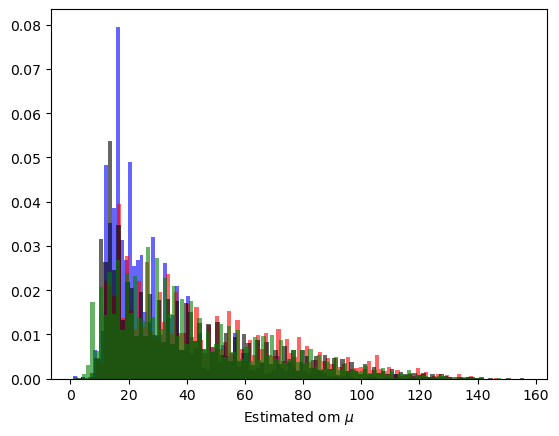

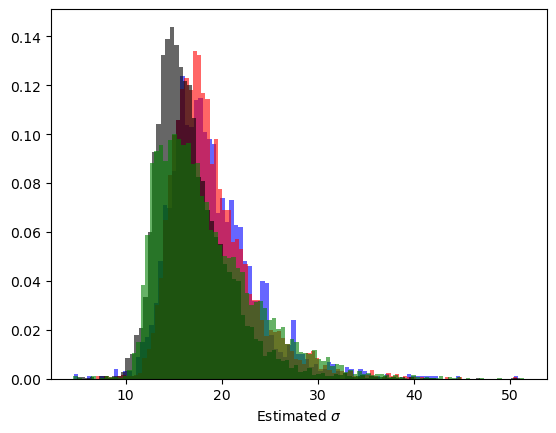

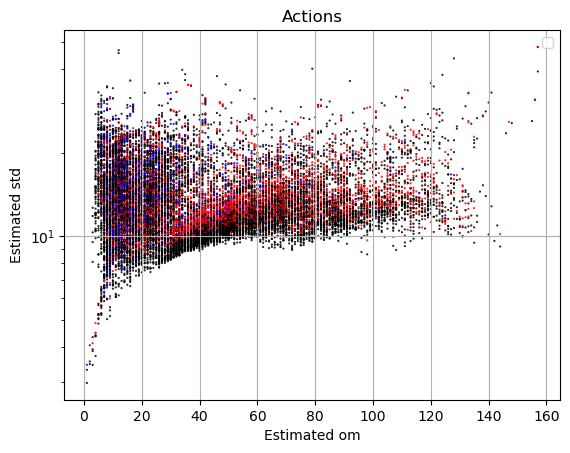

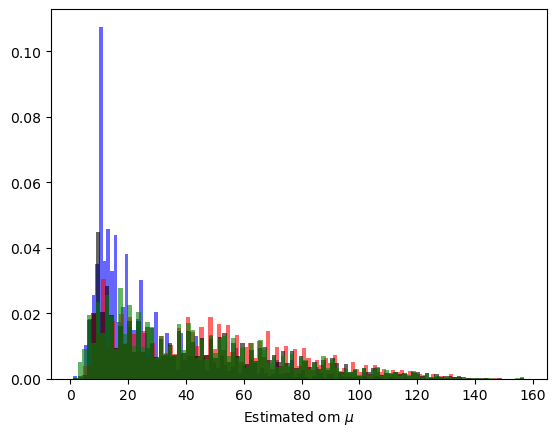

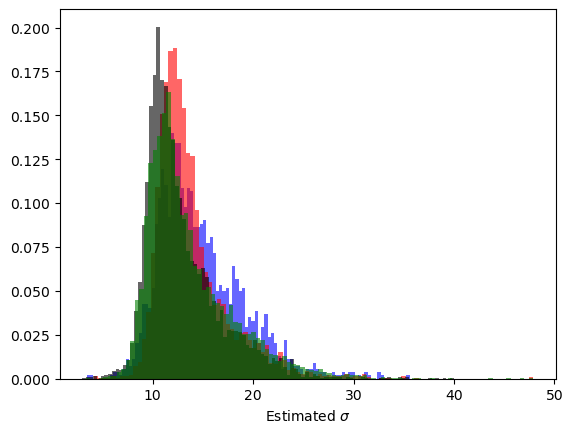

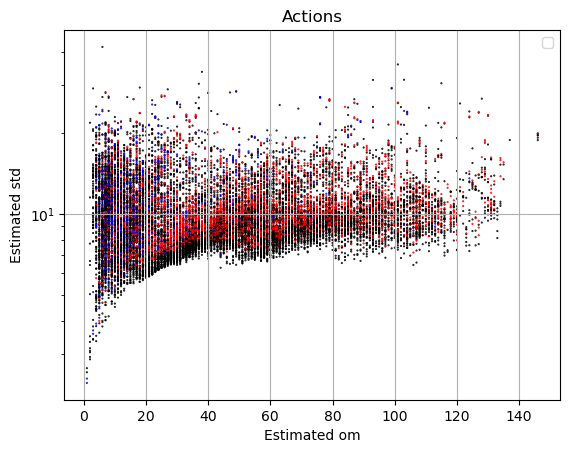

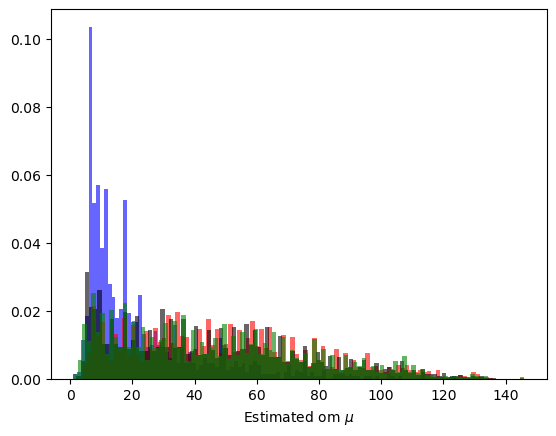

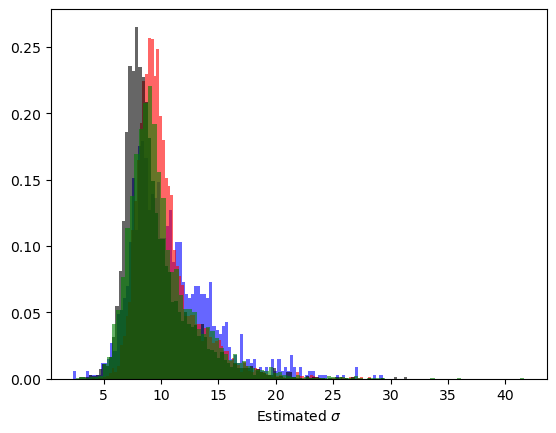

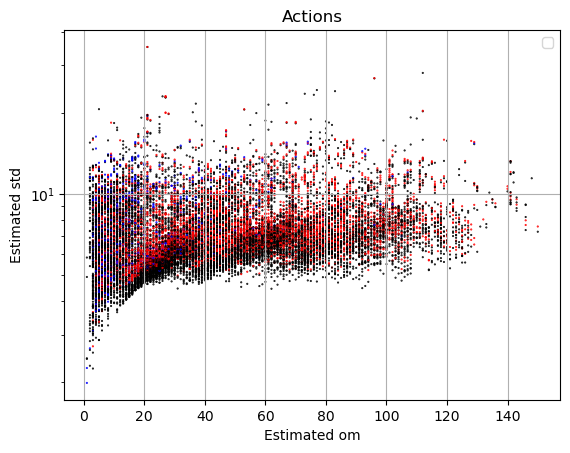

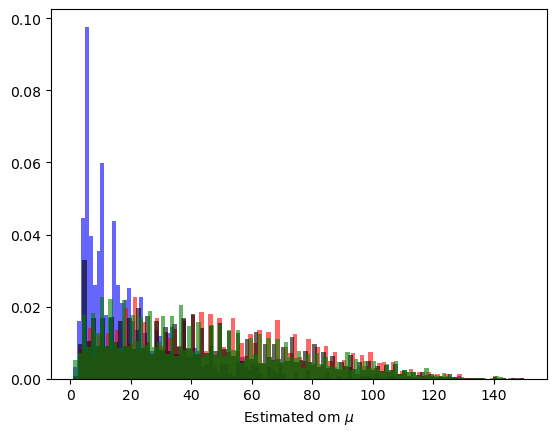

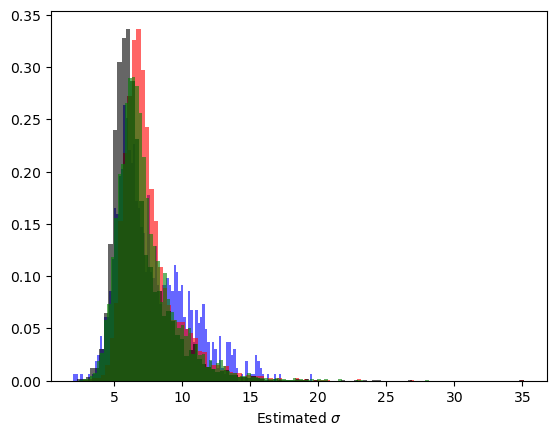

In [14]:
for tc in tcs:


    samples = 20
    model.load("ppo_N1e3_check_"+str(tc))
    env = est.EstimationEnv(length = int(1e3), tc = tc, om0=om0, sigma = sigma, initial_std=initial_std, 
                        seed_shot= seed_environment, seed_field = seed_environment)

    results = opt.game(episodes = samples, model=model, env=env)

    est.analyse_decisions(results, str(tc))



In [307]:
env.tc

50

In [47]:

policies = opt.policy_random_p, opt.policy_max_std, opt.policy_min_mu, opt.policy_interval
bounds = [np.array([[0,1],[0,1],[0,1]]),
            np.array([[0,10],[0,1]]),
            np.array([[0,100],[0,1]]),
            np.array([[0,100],[0,100],[0,100]])]
sigmas = [np.array(0.5), np.array(50.), np.array(50.), np.array(50.)]
means = [np.array([0.7,0.2,0.1]), np.array([5.,0.5]), np.array([50.,0.2]), np.array([50.,10.,2.])]


xs = []
for tc in [1e3]:
    xs_tc = []
    for pn,policy in enumerate(policies):
        if pn==0:
            print(bounds[pn])
            print(sigmas[pn])
            print(means[pn])
            env = est.EstimationEnv(length = 1000, tc = 1e3, om0=om0, sigma = sigma, initial_std=initial_std,
                            seed_field = None, seed_shot = None)
            Opt = opt.CMA_optimizer(policy = policies[pn], 
                            generations = 20, 
                            population_size=10, 
                            bounds = bounds[pn], 
                            sigma = sigmas[pn], 
                            mean= means[pn], 
                            episodes = 20,
                            env=env)
            sol = Opt.optimize()
            x_avg, f_avg = Opt.get_representative()
            xs_tc.append(x_avg)
    xs.append(xs_tc)
    

[[0 1]
 [0 1]
 [0 1]]
0.5
[0.7 0.2 0.1]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [48]:
xs_tc

[array([0.68408767, 0.10764053, 0.09382284])]

In [70]:
#save nested xs list to file
import pickle
with open('xs2.pkl', 'wb') as f:
    pickle.dump(xs, f)


In [15]:
#load nested xs list from file
import pickle
with open('xs.pkl', 'rb') as f:
    xs = pickle.load(f)


In [16]:
xs

[[array([0.73117156, 0.4093704 , 0.02254516]),
  array([6.02575545, 0.51700893]),
  array([55.43331841,  0.70820324]),
  array([46.3830937 , 13.06998139,  3.46838991])],
 [array([0.75365769, 0.24433546, 0.01646223]),
  array([5.81209298, 0.39922085]),
  array([49.21792449,  0.93059551]),
  array([49.83677335,  6.28488514,  0.66992279])],
 [array([0.72633717, 0.17840917, 0.00897916]),
  array([4.94913091, 0.53521408]),
  array([49.40604232,  0.63984954]),
  array([47.68936452,  9.4728695 ,  0.5825536 ])]]

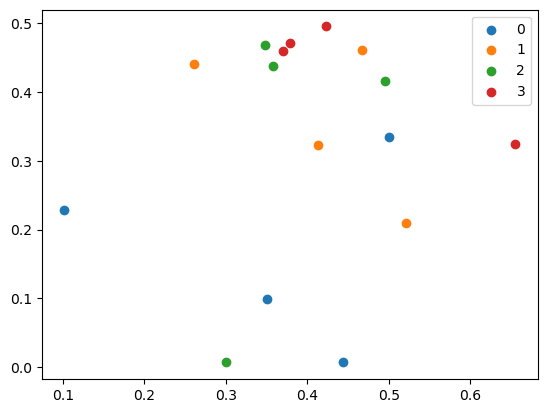

In [350]:
sol[:,:,:3] = sol[:,:,:3]/np.sum(sol[:,:,:3],axis=2)[...,None]
for k in range(4):
    plt.scatter(sol[k,:,0], sol[k,:,1], label = str(k))
plt.legend()

In [71]:
import numpy as np
import optimisation as opt
import estimation_environment as est
import importlib
importlib.reload(opt)
importlib.reload(est)
policies = 7
'''
-always flip
-random
-random with flip p =0.8, est p = 0.15, check p = 0,5
-flip only if std/mu below 0.5
-flip only if mu is above 10
-estimate 5 shots every 30 shots
-agent
'''





#model = model.load("ppo_bayes2")

samples = 50

policies_all = opt.policy_flip, opt.policy_random, opt.policy_random_p, opt.policy_max_std, opt.policy_min_mu, opt.policy_interval

tot_reward = np.zeros((len(tcs),len(policies_all)+1,samples))

for tcn, tc in enumerate(tcs):
    model.load("ppo_N500_"+str(tc))
    
    for pn,policy in enumerate(policies_all):
        
        env = est.EstimationEnv(length = 500, tc = tc, om0=om0, sigma = sigma, initial_std=initial_std, 
                    seed_shot= seed_environment, seed_field = seed_environment)
        if pn>1:
            results = opt.game(episodes = samples, policy=policies_all[pn], env=env, x = xs[tcn][pn-2], rng_est = np.random.default_rng(seed_estimation))
            tot_reward[tcn,pn,:] = np.sum(results.rewards,axis=1)
        else:
            results = opt.game(episodes = samples, policy=policies_all[pn], env=env, rng_est = np.random.default_rng(seed_estimation))
            tot_reward[tcn,pn,:] = np.sum(results.rewards,axis=1)
    
    env = est.EstimationEnv(length = 500, tc = tc, om0=om0, sigma = sigma, initial_std=initial_std, 
                    seed_shot= seed_environment, seed_field = seed_environment)
    results = opt.game(episodes = samples, model=model, env=env)
    tot_reward[tcn,-1,:] =  np.sum(results.rewards,axis=1)

In [58]:
tcs

[100, 200, 300]

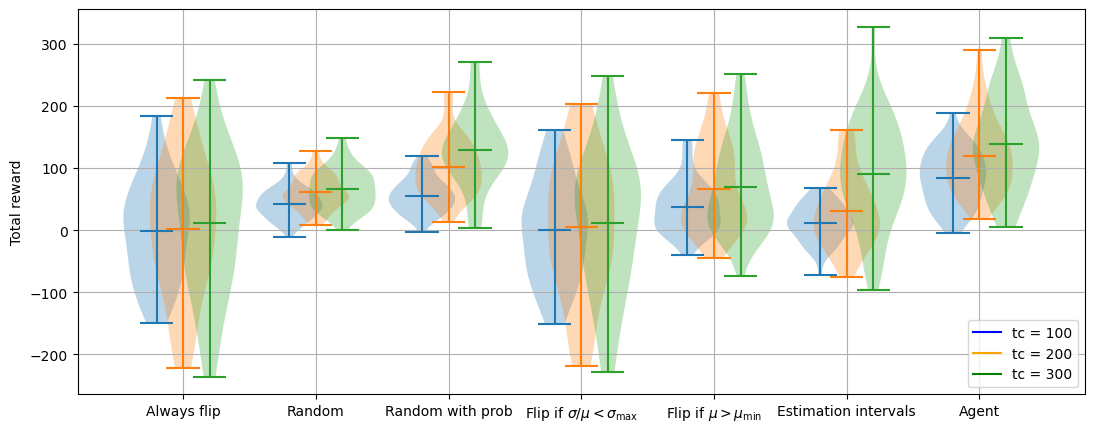

In [66]:
#compare rewards using different policies via violin plot
plt.figure(figsize=(13,5))
for tcn,tc in enumerate(tcs):
    plt.violinplot(tot_reward[tcn].T, showmeans=True, positions=np.arange(1,8)-.2+tcn*0.2, widths=0.5)
plt.xticks(np.arange(1,8),["Always flip","Random","Random with prob",r"Flip if $\sigma/\mu<\sigma_\text{max}$",r"Flip if $\mu>\mu_\text{min}$",
                            "Estimation intervals","Agent"])
plt.ylabel("Total reward")
#plt.ylim(-200,550)
plt.grid()
plt.plot([],[],color = "blue", label="tc = 100")
plt.plot([],[],color = "orange", label="tc = 200")
plt.plot([],[],color = "green", label="tc = 300")
plt.legend(loc="lower right")


<Figure size 1300x500 with 0 Axes>

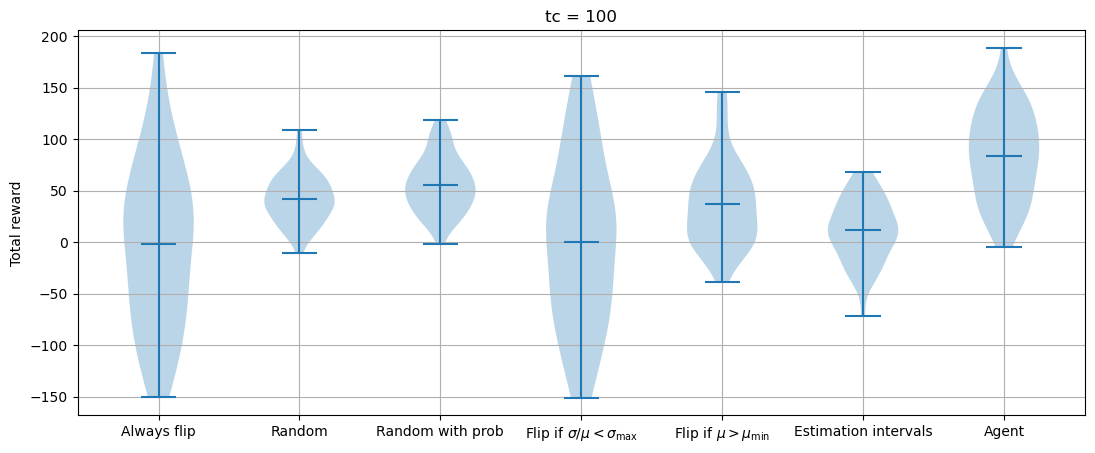

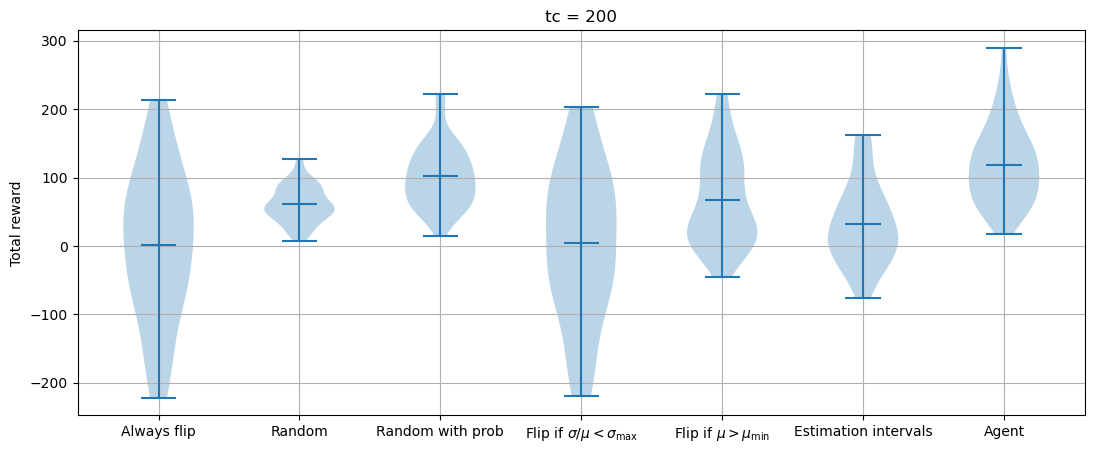

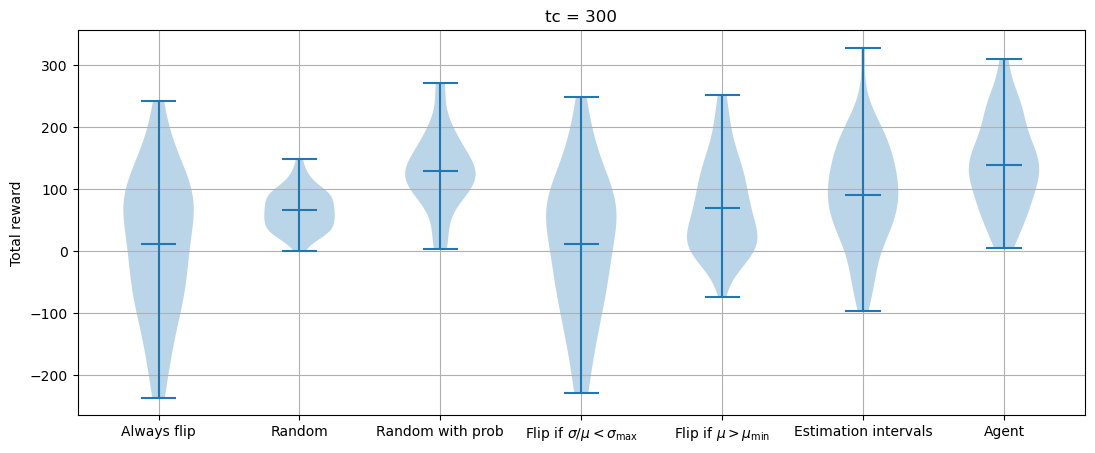

In [68]:
#compare rewards using different policies via violin plot
plt.figure(figsize=(13,5))
for tcn,tc in enumerate(tcs):
    plt.figure(figsize=(13,5))
    plt.violinplot(tot_reward[tcn].T, showmeans=True, positions=np.arange(1,8), widths=0.5)
    plt.xticks(np.arange(1,8),["Always flip","Random","Random with prob",r"Flip if $\sigma/\mu<\sigma_\text{max}$",r"Flip if $\mu>\mu_\text{min}$",
                                "Estimation intervals","Agent"])
    plt.ylabel("Total reward")
    plt.grid()
    plt.title("tc = "+str(tc))
    #plt.ylim(-200,550)
plt.plot([],[],color = "blue", label="tc = 50")
plt.plot([],[],color = "orange", label="tc = 500")
plt.plot([],[],color = "green", label="tc = 5000")
#plt.legend(loc="lower right")